In [91]:
from yfetch import get_stock_history
import pandas as pd

In [92]:
symbol = 'SPMO'
history = get_stock_history(symbol, interval='1wk').tail(110)

Loaded cached history for SPMO (261 rows)


In [93]:
def contains_third_friday(row):
  d = row.name
  assert d.dayofweek == 0, f'{d} is not a Monday'
  friday = d.day + 4
  return 15 <= friday <= 21

df = history[history.apply(contains_third_friday, axis=1)]

In [94]:
call_prices = {
  1: 2.50/103,
  2: 4.00/103,
  5: 6.30/103,
  8: 8.60/103,
}

In [95]:
cp_df = pd.DataFrame(index=df.index)

for q in [1, 2]:
  p = call_prices[q]
  change = df['Close'].pct_change(periods=q).dropna()
  call_profits = (change / p - 1).clip(lower=-1)
  cp_df[f'CP {q}m'] = call_profits


In [96]:
def is_quarter_cycle(row):
  d = row.name
  return d.month % 3 == 1

df = df[df.apply(is_quarter_cycle, axis=1)]

In [97]:
for q, p in [(1,5), (2,8)]:
  p = call_prices[p]
  change = df['Close'].pct_change(periods=q).dropna()
  call_profits = (change / p - 1).clip(lower=-1)
  cp_df[f'CP {q}q'] = call_profits

,Mean,Median
CP 1m,0.529683,-0.026659
CP 2m,0.515796,0.222201
CP 1q,0.270062,0.152975
CP 2q,1.099025,1.499133


<Axes: title={'center': 'SPMO Call Profits'}, xlabel='Date', ylabel='Call Profit'>

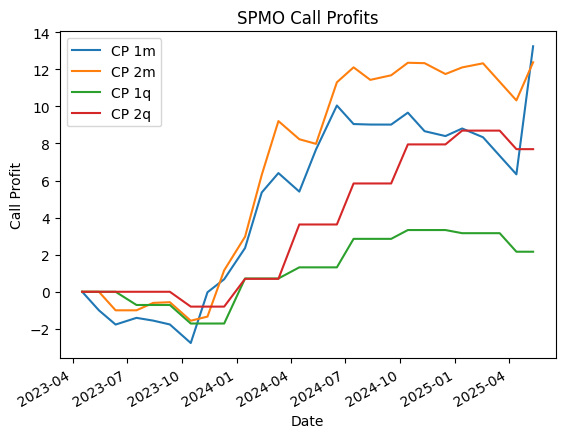

In [98]:

summary_stats = pd.DataFrame({
  'Mean': cp_df.mean(),
  'Median': cp_df.median()
})
display(summary_stats)

cs = cp_df.fillna(0).cumsum()
cs.plot(title=f'{symbol} Call Profits', ylabel='Call Profit', xlabel='Date')